In [3]:
# Import necessary libraries

# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Machine learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


In [4]:
# Load the dataset
df = pd.read_csv("wine.csv")

In [5]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [8]:
df.sample(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
5287,9.6,0.38,0.31,2.5,0.096,16.0,49.0,0.99820,3.19,0.70,10.0,7
4695,6.7,0.35,0.32,9.0,0.032,29.0,113.0,0.99188,3.13,0.65,12.9,7
5040,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6
1269,8.4,0.35,0.56,13.8,0.048,55.0,190.0,0.99930,3.07,0.58,9.4,6
4582,6.3,0.37,0.51,6.3,0.048,35.0,146.0,0.99430,3.10,1.01,10.5,6
5316,11.9,0.38,0.51,2.0,0.121,7.0,20.0,0.99960,3.24,0.76,10.4,6
3373,6.9,0.28,0.24,2.1,0.034,49.0,121.0,0.98882,2.98,0.43,13.2,7
3478,6.2,0.36,0.45,10.4,0.060,22.0,184.0,0.99711,3.31,0.56,9.8,6
4340,7.3,0.19,0.27,13.9,0.057,45.0,155.0,0.99807,2.94,0.41,8.8,8
991,8.2,0.26,0.44,1.3,0.046,7.0,69.0,0.99440,3.14,0.62,10.2,4


In [9]:
# Generate summary statistics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [10]:
df.shape

(6497, 12)

In [11]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

1179


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
5,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
7,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
8,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
20,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
...,...,...,...,...,...,...,...,...,...,...,...,...
6461,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
6462,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
6465,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
6479,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [13]:
df.drop_duplicates(inplace =True)

In [14]:
df.shape   # -----> previous count 6497 - 5318 = 1179

(5318, 12)

In [130]:
# SPLIT DATA INTO X AND Y

In [20]:
x = df.drop(columns=['quality'])
y = df['quality']

In [30]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6


In [34]:
y.head()

0    6
1    6
2    6
3    6
6    6
Name: quality, dtype: int64

In [13]:
# Corelation between each col and target column(Qality)

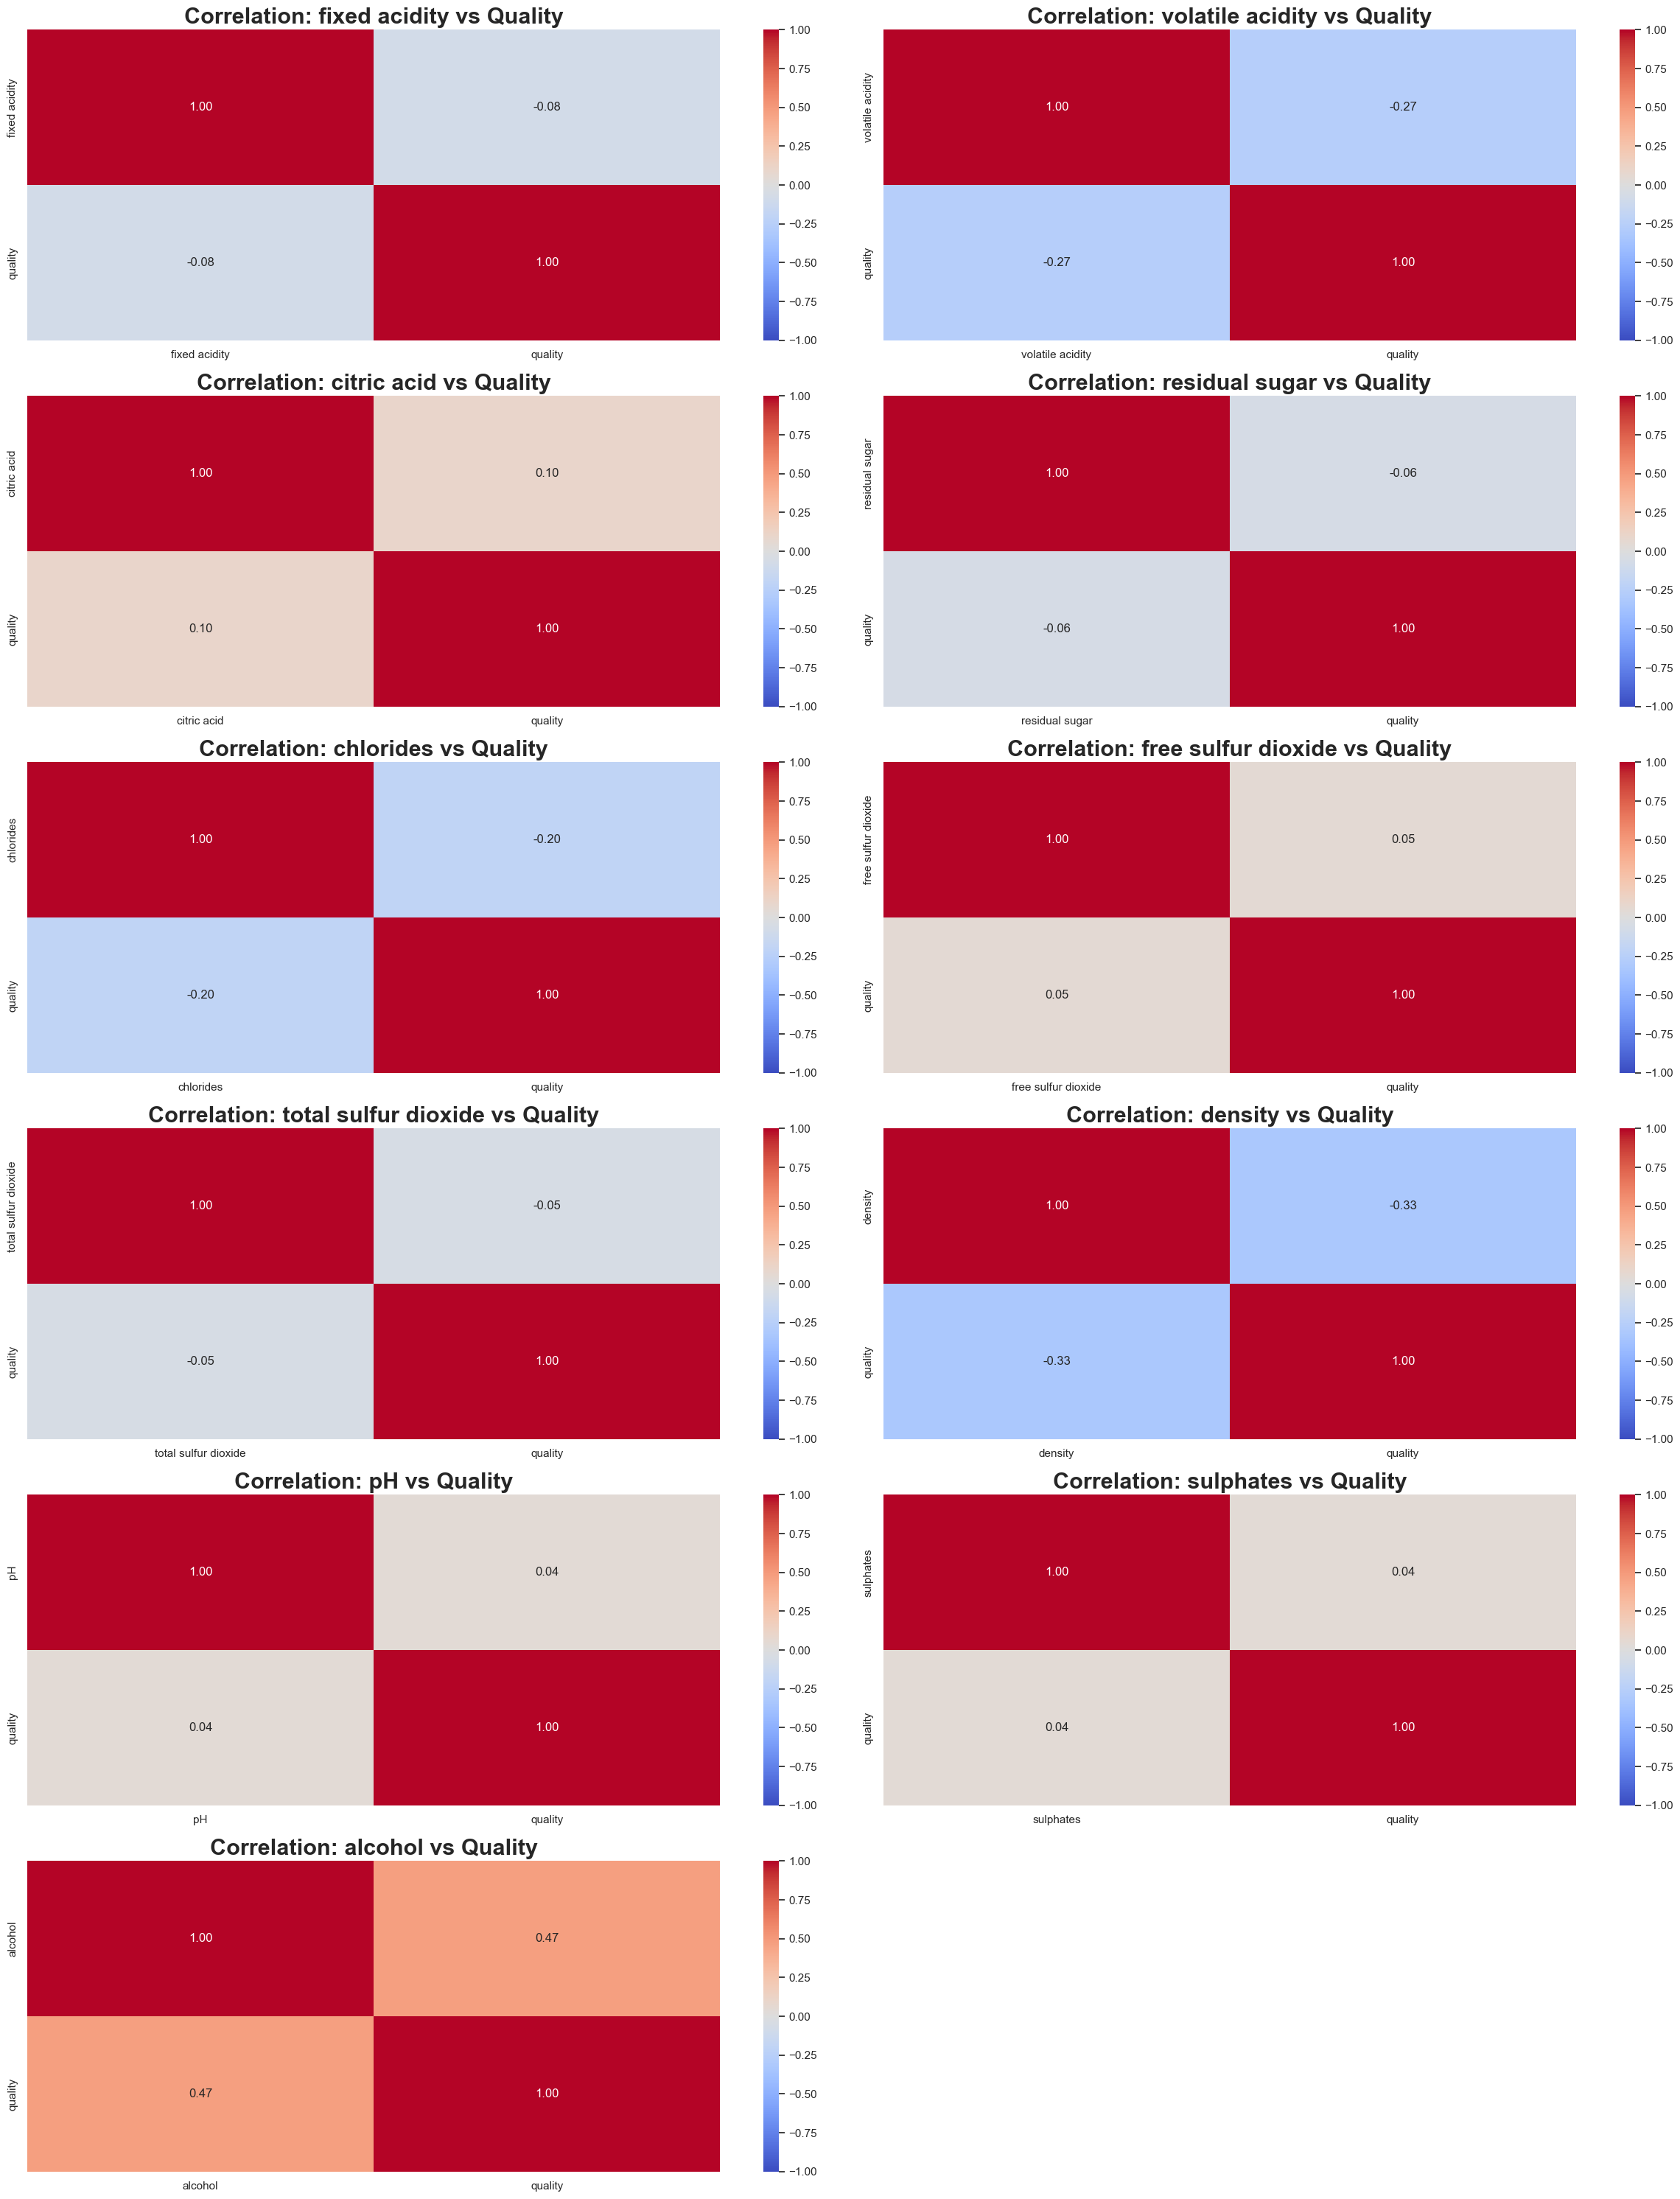

In [22]:
sns.set(style="whitegrid")

# Creating subplots
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(24, 30))  # Adjust grid size based on the number of numeric columns
axes = axes.flatten()

for i, col in enumerate(x.columns):
    corr_matrix = pd.DataFrame({col: x[col], 'quality': y}).corr()  # Compute correlation matrix
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1, ax=axes[i])
    
    axes[i].set_title(f'Correlation: {col} vs Quality', fontsize=22, fontweight='bold')

# Remove extra empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


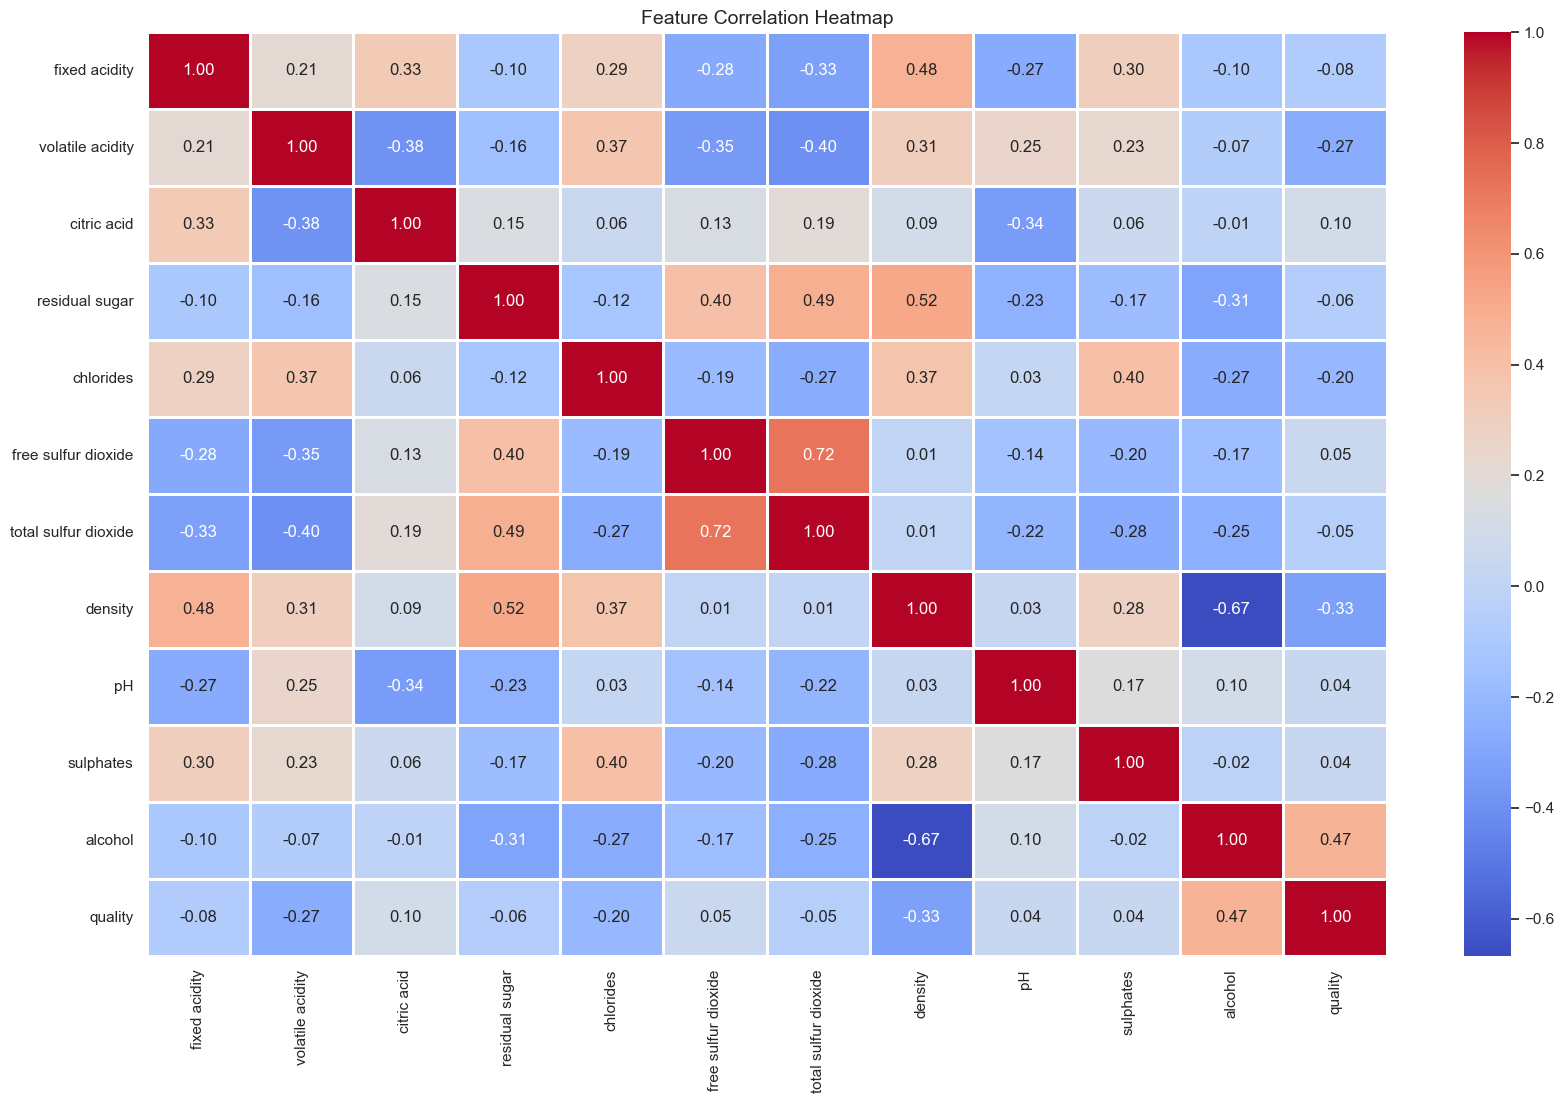

In [26]:
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=1, fmt=".2f")

# Add title
plt.title("Feature Correlation Heatmap", fontsize=14)

# Show plot
plt.show()

In [28]:
print(df.skew())

fixed acidity           1.650055
volatile acidity        1.504115
citric acid             0.483817
residual sugar          1.706027
chlorides               5.339077
free sulfur dioxide     1.363772
total sulfur dioxide    0.063667
density                 0.666033
pH                      0.390358
sulphates               1.809099
alcohol                 0.545866
quality                 0.147470
dtype: float64


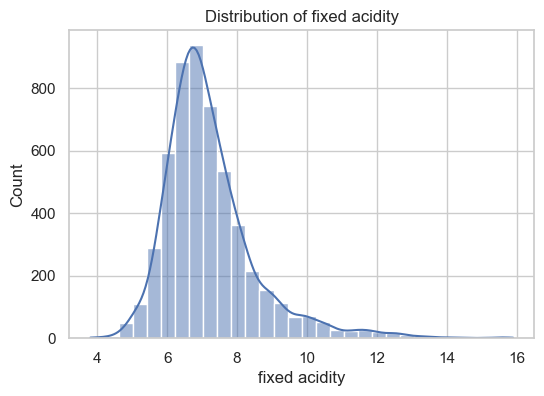

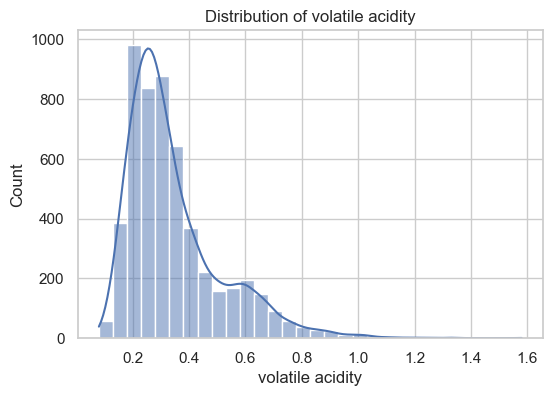

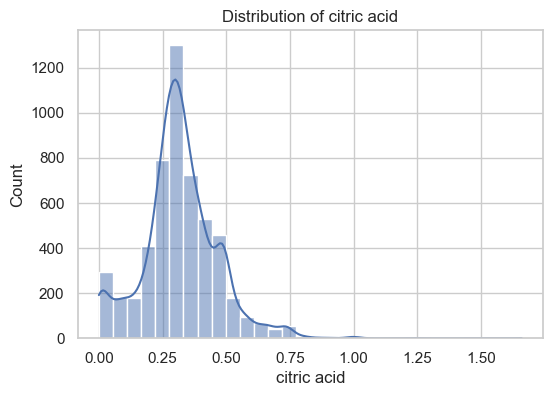

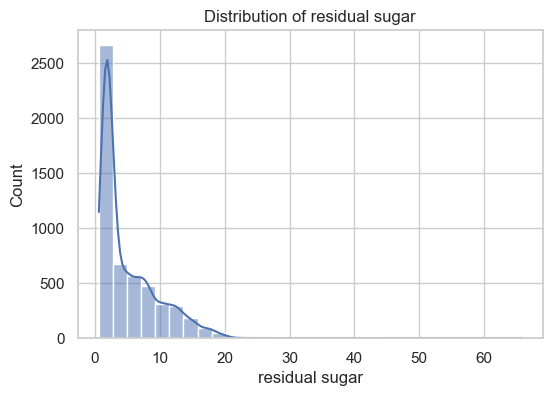

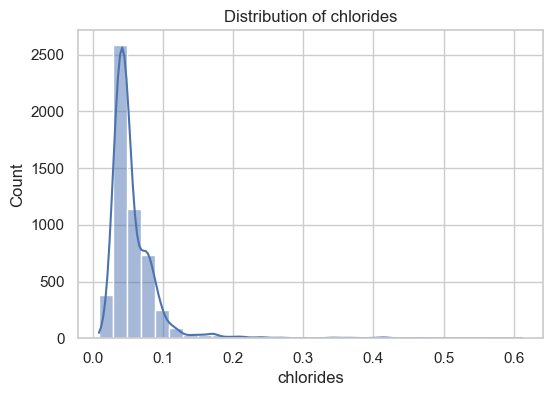

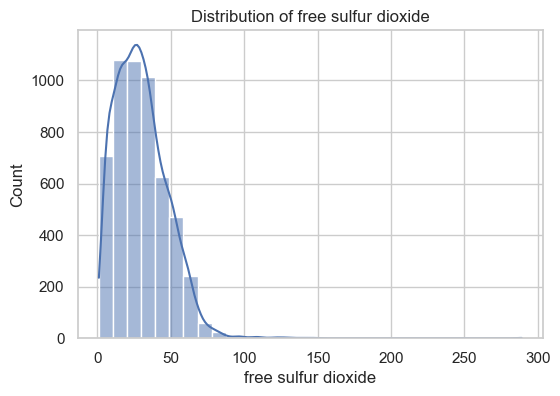

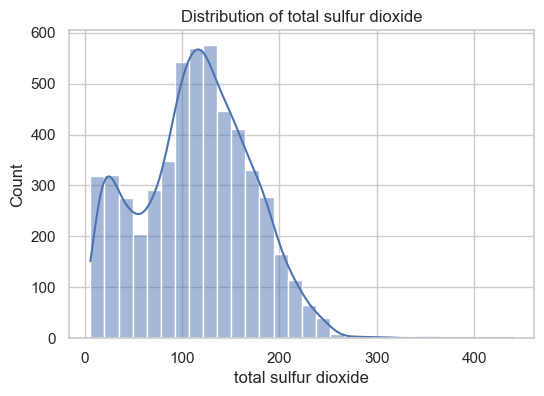

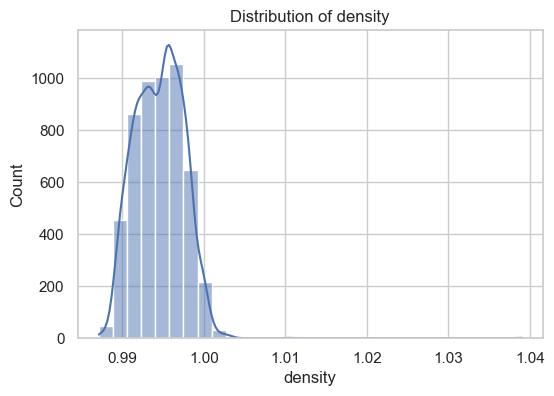

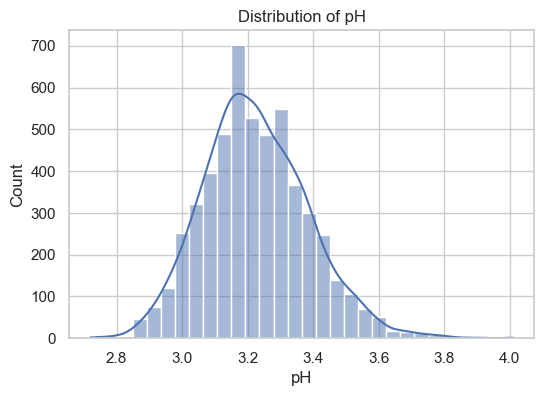

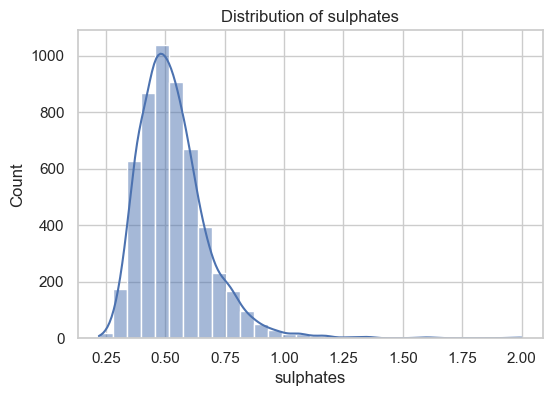

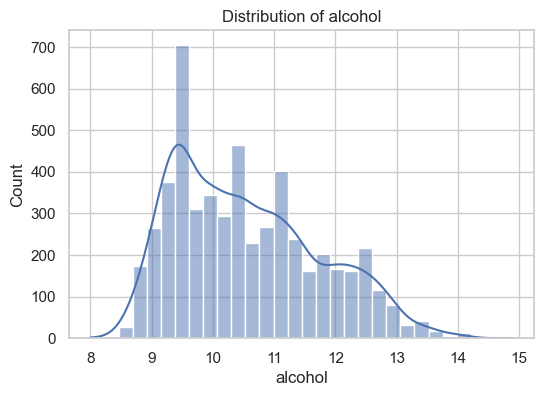

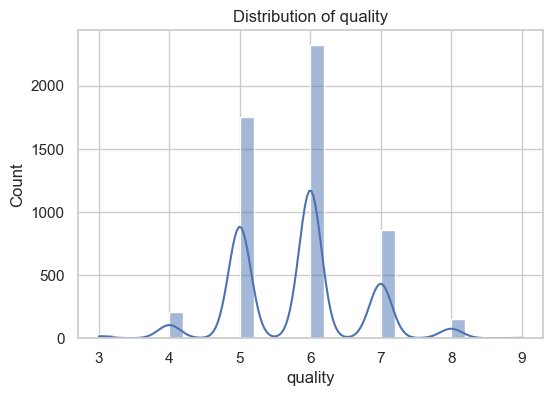

In [32]:
for col in df.columns:
    plt.figure(figsize=(6, 4))  # Create a new figure for each column
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

Feature: fixed acidity
Q1: 6.40, Q3: 7.70
IQR: 1.30
Lower Bound: 4.45, Upper Bound: 9.65
Total Outliers to be replaced: 304
**************************************************


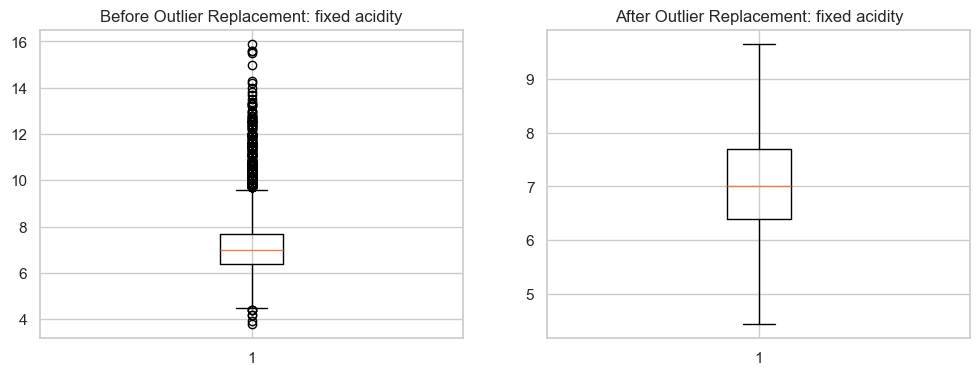

Feature: volatile acidity
Q1: 0.23, Q3: 0.41
IQR: 0.18
Lower Bound: -0.04, Upper Bound: 0.68
Total Outliers to be replaced: 279
**************************************************


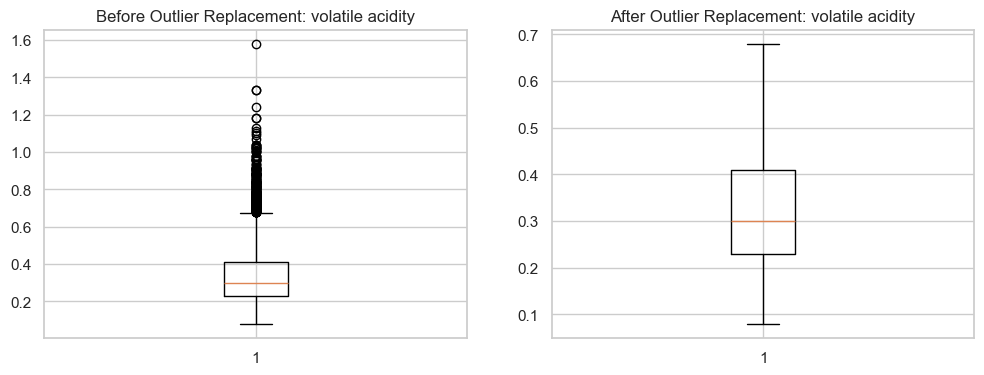

Feature: citric acid
Q1: 0.24, Q3: 0.40
IQR: 0.16
Lower Bound: -0.00, Upper Bound: 0.64
Total Outliers to be replaced: 143
**************************************************


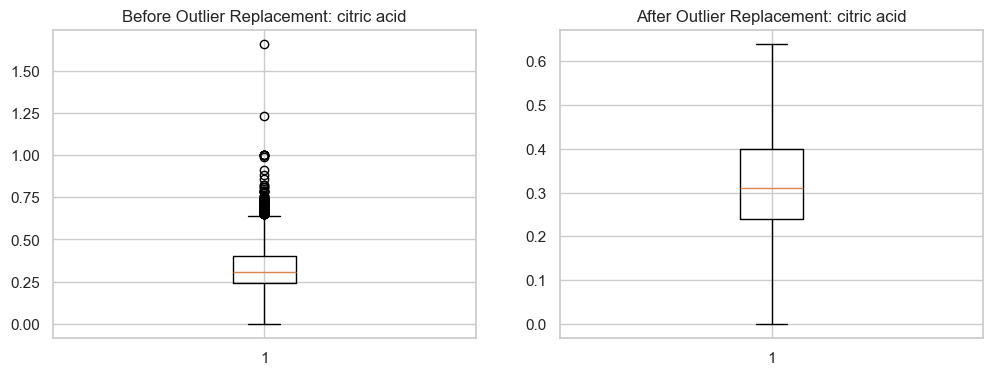

Feature: residual sugar
Q1: 1.80, Q3: 7.50
IQR: 5.70
Lower Bound: -6.75, Upper Bound: 16.05
Total Outliers to be replaced: 141
**************************************************


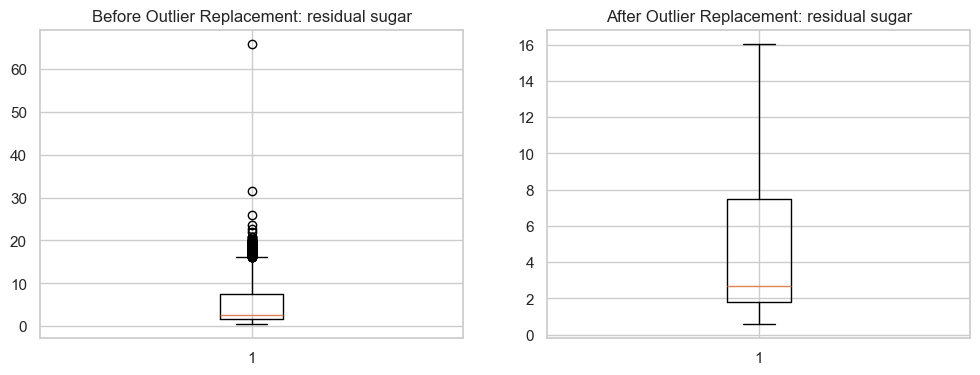

Feature: chlorides
Q1: 0.04, Q3: 0.07
IQR: 0.03
Lower Bound: -0.00, Upper Bound: 0.11
Total Outliers to be replaced: 237
**************************************************


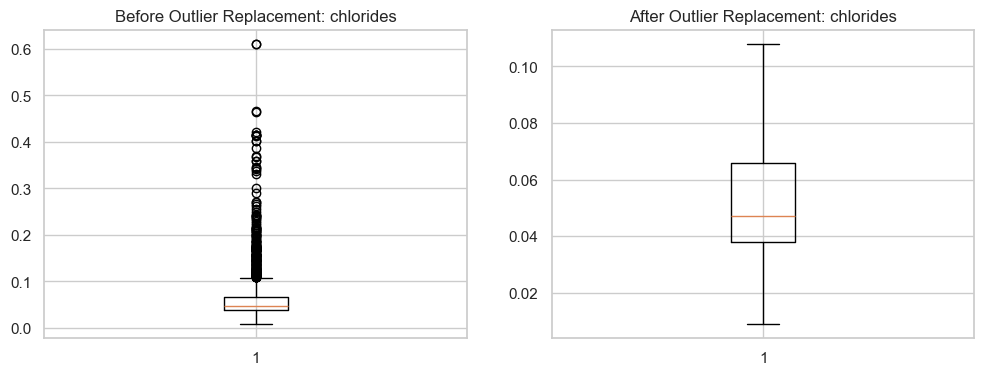

Feature: free sulfur dioxide
Q1: 16.00, Q3: 41.00
IQR: 25.00
Lower Bound: -21.50, Upper Bound: 78.50
Total Outliers to be replaced: 44
**************************************************


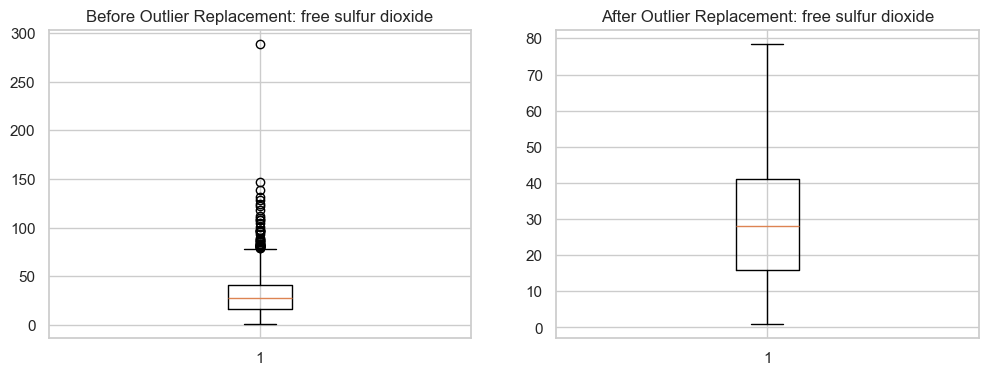

Feature: total sulfur dioxide
Q1: 74.00, Q3: 153.75
IQR: 79.75
Lower Bound: -45.62, Upper Bound: 273.38
Total Outliers to be replaced: 10
**************************************************


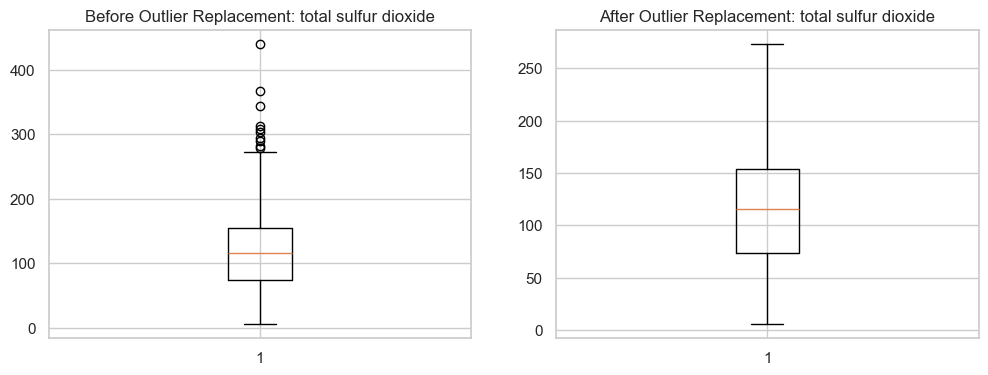

Feature: density
Q1: 0.99, Q3: 1.00
IQR: 0.00
Lower Bound: 0.99, Upper Bound: 1.00
Total Outliers to be replaced: 3
**************************************************


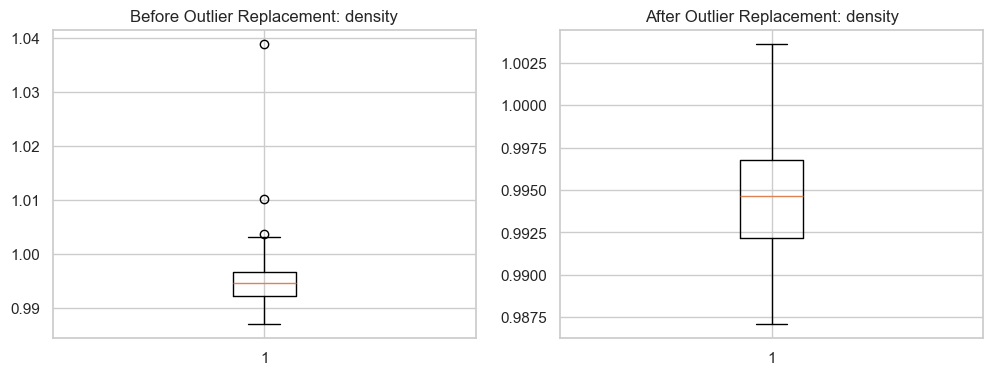

Feature: pH
Q1: 3.11, Q3: 3.33
IQR: 0.22
Lower Bound: 2.78, Upper Bound: 3.66
Total Outliers to be replaced: 49
**************************************************


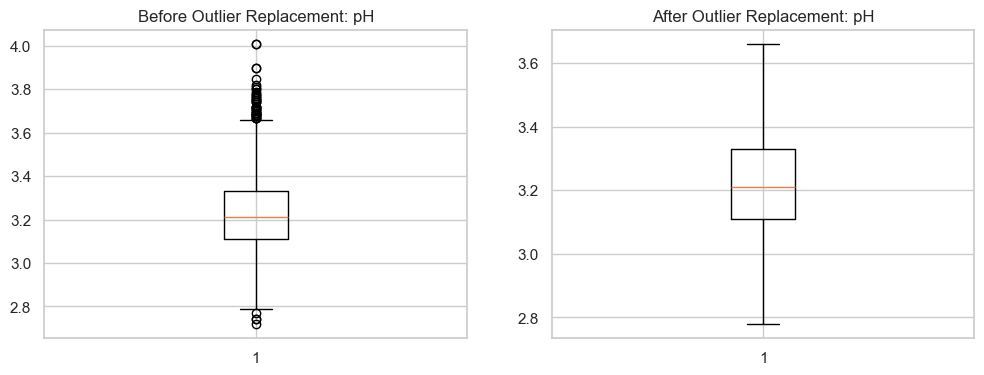

Feature: sulphates
Q1: 0.43, Q3: 0.60
IQR: 0.17
Lower Bound: 0.17, Upper Bound: 0.85
Total Outliers to be replaced: 163
**************************************************


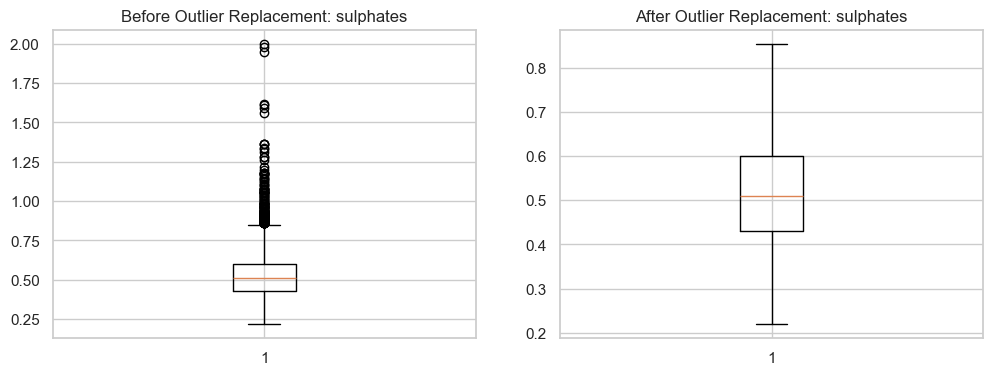

Feature: alcohol
Q1: 9.50, Q3: 11.40
IQR: 1.90
Lower Bound: 6.65, Upper Bound: 14.25
Total Outliers to be replaced: 1
**************************************************


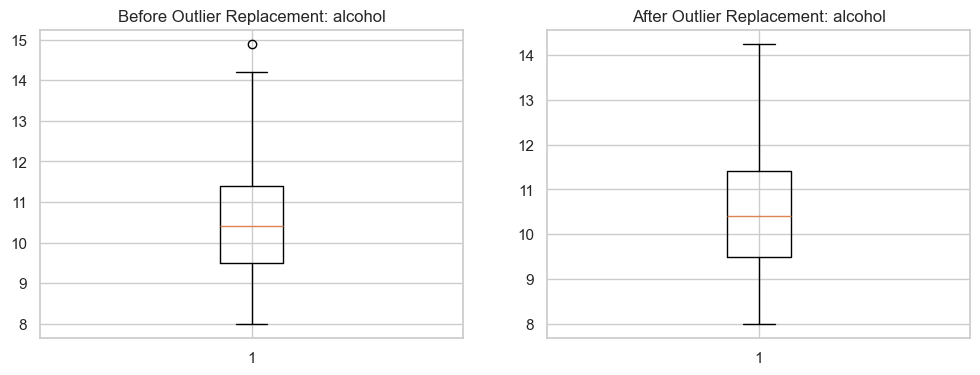

In [36]:
# a = x.describe().columns                                                 #----------># Identify all numerical columns

for col in x:
    
    q1 = df[col].quantile(0.25)                                          #-----------> Compute IQR and bounds
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

   
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]               #---------------> Count outliers before replacement
    num_outliers = outliers.shape[0]

    print(f"Feature: {col}")
    print(f"Q1: {q1:.2f}, Q3: {q3:.2f}")
    print(f"IQR: {iqr:.2f}")
    print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    print(f"Total Outliers to be replaced: {num_outliers}")
    print("*" * 50)

    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))                                 #----------> Create side-by-side boxplots

    # Boxplot before replacement
    axes[0].boxplot(df[col])
    axes[0].set_title(f"Before Outlier Replacement: {col}")
    axes[0].grid(True)

    
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])               #-------> Replace outliers using IQR 
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])

    
    axes[1].boxplot(df[col])                                                      #--------> # Boxplot after replacement
    axes[1].set_title(f"After Outlier Replacement: {col}")
    axes[1].grid(True)

    
    plt.show()


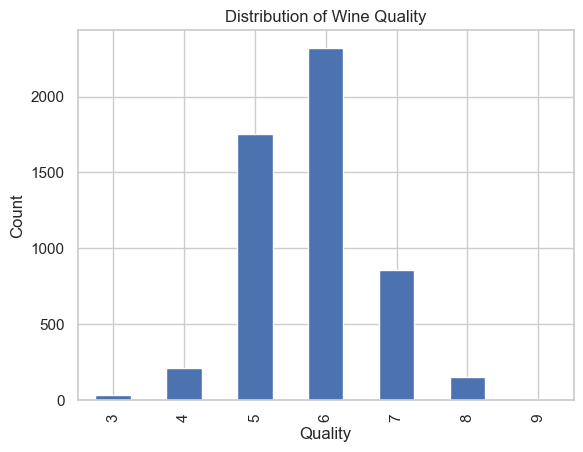

In [38]:
y.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality')
plt.show()

### Handling class imbalancement 

In [40]:
y.value_counts()

quality
6    2323
5    1751
7     855
4     206
8     148
3      30
9       5
Name: count, dtype: int64

In [44]:
# LabelEncoding 
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Smote --> balancing data
smote = SMOTE(k_neighbors=4)
x_res, y_res = smote.fit_resample(x, y)

In [46]:
pd.Series(y_res).value_counts()

3    2323
2    2323
4    2323
5    2323
1    2323
0    2323
6    2323
Name: count, dtype: int64

In [48]:
# Spilting 

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res,test_size=0.2, random_state=0)

# DECISION TREE

In [52]:
dt_model = DecisionTreeClassifier()  # base model
dt_model

DecisionTreeClassifier()

In [54]:
dt_clf = dt_model.fit(x_train, y_train)
dt_clf

DecisionTreeClassifier()

In [56]:
y_pred_test = dt_clf.predict(x_test)

In [58]:
print("Train Accuracy:",dt_clf.score(x_train, y_train))

Train Accuracy: 1.0


In [60]:
print("Test Accuracy:",dt_clf.score(x_test, y_test))

Test Accuracy: 0.7500768521364894


In [62]:
print("Tree Depth:", dt_clf.get_depth())  # Print for clarity

Tree Depth: 28


In [64]:
hyperparameter = {
    "criterion": ["gini", "entropy"],  # Try both splitting strategies
    "max_depth": np.arange(15, 35),  # Tree depth tuning
    "min_samples_split": np.arange(4, 10),  # Node split condition
    "min_samples_leaf": [1, 2, 5, 10]  # Avoid too small leaves
}

In [66]:
# RandomizedSearchCV ---->  reduce computation time.

rs_cv_d1 = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), 
                              hyperparameter, 
                              cv=5, 
                              scoring='accuracy', 
                              n_jobs=-1, 
                              n_iter=10,  # Number of random combinations to try
                              random_state=42)

In [72]:
rs_cv_d1.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
       32, 33, 34]),
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': array([4, 5, 6, 7, 8, 9])},
                   random_state=42, scoring='accuracy')

In [73]:
rs_cv_d1.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=32, min_samples_split=9,
                       random_state=42)

In [120]:
dt_modle=rs_cv_d1.best_estimator_ 
dt_clf3 =dt_modle.fit(x_train,y_train)

In [122]:
print("Train Accuracy:",dt_clf3.score(x_train,y_train))

Train Accuracy: 0.932349323493235


In [124]:
print("Test Accuracy:",dt_clf3.score(x_test,y_test))

Test Accuracy: 0.7254841684598832


In [126]:
y_pred = dt_clf3.predict(x_test)

In [128]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)                                                 # correctly predicts wine quality
precision = precision_score(y_test, y_pred, average='macro')    
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.73
Precision: 0.72
Recall: 0.72
F1 Score: 0.72


In [86]:
# Predict on test data
y_pred = dt_clf3.predict(x_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       480
           1       0.82      0.84      0.83       467
           2       0.52      0.56      0.54       445
           3       0.35      0.34      0.34       442
           4       0.61      0.56      0.58       483
           5       0.83      0.82      0.82       480
           6       0.99      1.00      1.00       456

    accuracy                           0.73      3253
   macro avg       0.72      0.72      0.72      3253
weighted avg       0.72      0.73      0.72      3253



# RANDOM FOREST

In [88]:
rf_model = RandomForestClassifier(random_state=42)  
rf_model

RandomForestClassifier(random_state=42)

In [90]:
rf_clf = rf_model.fit(x_train, y_train)
rf_clf

RandomForestClassifier(random_state=42)

In [91]:
y_pred_test = rf_clf.predict(x_test)

In [92]:
print("Train Accuracy:",rf_clf.score(x_train, y_train))

Train Accuracy: 1.0


In [93]:
print("Test Accuracy:",rf_clf.score(x_test, y_test))

Test Accuracy: 0.8435290501075929


In [98]:
# Hyperparameter Tunning

hyperparameter = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],  # ------------>Number of features to consider when looking for the best split. 
    'bootstrap': [True, False]    # ---------> Whether to use bootstrapping
}


In [100]:
rs_cv_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(), 
    param_distributions=hyperparameter, 
    n_iter=20,  # Number of different combinations to try
    cv=5, 
    verbose=2, 
    random_state=42, 
    n_jobs=-1
)

In [102]:
rs_cv_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

In [103]:
rs_cv_rf.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=40, max_features='log2',
                       n_estimators=300)

In [108]:
rf_model = rs_cv_rf.best_estimator_  
rf_clf3 = rf_model.fit(x_train, y_train)

In [109]:
print("Train Accuracy:",rf_clf3.score(x_train, y_train))

Train Accuracy: 1.0


In [110]:
print("Test Accuracy:",rf_clf3.score(x_test, y_test))

Test Accuracy: 0.8558253919458961


In [111]:
y_pred = rf_clf3.predict(x_test)

In [112]:
 # Calculate metrics

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # Use 'weighted' for imbalanced classes
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.86
Precision: 0.84
Recall: 0.85
F1 Score: 0.85


In [113]:
# Predict on test data
y_pred = rf_clf3.predict(x_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       480
           1       0.90      0.97      0.93       467
           2       0.71      0.72      0.72       445
           3       0.59      0.45      0.52       442
           4       0.78      0.83      0.80       483
           5       0.94      0.98      0.96       480
           6       1.00      1.00      1.00       456

    accuracy                           0.86      3253
   macro avg       0.84      0.85      0.85      3253
weighted avg       0.85      0.86      0.85      3253

